<a href="https://colab.research.google.com/github/mehdiabbasidev/darsman-deep-learning/blob/main/SingleNeuron_LinearModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dataset download link:
https://drive.google.com/file/d/1CsrutWNpCwYWR93a3Z5Je8LYRCWjK6QD/view?usp=sharing

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split

## Basic Neuron with Bias, Two Inputs, and One Output
###  $y=w_{0}+x_{1}w_{1}+x_{2}w_{2}$

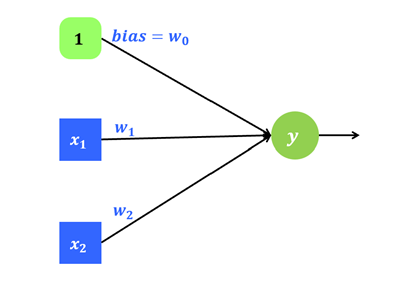

In [ ]:
torch.manual_seed(42)
# Define input data
X=torch.tensor([[1, -1]], dtype=torch.float32)

# Define a linear layer model with bias
model  = nn.Linear(in_features=2, out_features=1)

# Display the bias and weights of the layer
print(f"Bias : {model.bias.item():.3f}")
print(f"Weights :{model.weight.detach().numpy()}")

# Compute the predicted output
y_pred=model(X)                        # y_pred= -0.166 + (1*0.5406104) + (-1*0.5869042)

# Display the features and predicted output
print(f"features :{X.detach().numpy()}")
print(f"y_pred :  {y_pred.item():.3f}")

Bias : -0.166
Weights :[[0.5406104 0.5869042]]
features :[[ 1. -1.]]
y_pred :  -0.212


## Neuron Structure: four inputs, two outputs
##### $y_{1}=w_{0,1}+x_{1}w_{1,1}+x_{2}w_{2,1}+x_{3}w_{3,1}+x_{4}w_{4,1}$
##### $y_{2}=w_{0,2}+x_{1}w_{1,2}+x_{2}w_{2,2}+x_{3}w_{3,2}+x_{4}w_{4,2}$

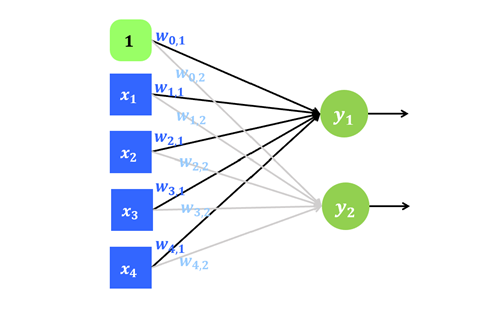

In [ ]:
# Define input data and actual output
X = torch.randn(200, 4)
yt = torch.randn(200, 2)

# Define a linear layer model with bias
model  = nn.Linear(in_features=4, out_features=2,bias=True)

# Display the bias and weights of the layer
print(f"biast model : {model.bias.detach().numpy()}")
print(f"weight model: {model.weight.detach().numpy()}")

# Compute the predicted output
yp = model(X)

# Calculate the MSE loss
loss_fn = nn.MSELoss()
mse=loss_fn(yp, yt)
print(f"MSE : {mse.item():.3f}")

biast model : [ 0.2951554 -0.3700536]
weight model: [[-0.04975098  0.3602321   0.10614586 -0.308272  ]
 [-0.09042227 -0.35904545  0.23379207  0.14626348]]
MSE : 1.537


## Training a Simple Linear Model with SGD Optimizer in PyTorch

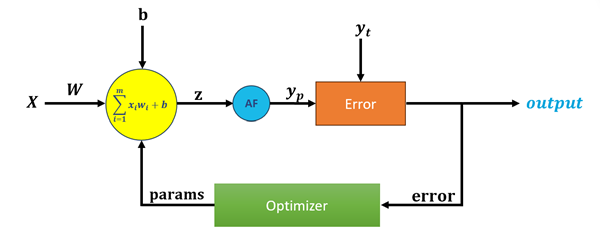

In [ ]:
x = torch.tensor([[1, -1]], dtype=torch.float32)
yt = torch.randn(1)

model = nn.Linear(in_features=2, out_features=1)
loss_fn = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

for epoch in range(10):
    yp = model(x)
    mse = loss_fn(yp, yt.unsqueeze(1))
    print(f"bias: {model.bias.detach().numpy()}\tweight: {model.weight.detach().numpy()} \t=> MSE: {mse.item():.6f}")
    mse.backward()
    optimizer.step()
    optimizer.zero_grad()

bias: [0.27410877]	weight: [[-0.42152056  0.39850596]] 	=> MSE: 0.4449620545
bias: [0.1406978]	weight: [[-0.5549315  0.5319169]] 	=> MSE: 0.0711939037
bias: [0.08733343]	weight: [[-0.6082959  0.5852813]] 	=> MSE: 0.0113910092
bias: [0.0659877]	weight: [[-0.62964165  0.60662705]] 	=> MSE: 0.0018225615
bias: [0.0574494]	weight: [[-0.63817996  0.61516535]] 	=> MSE: 0.0002916147
bias: [0.05403406]	weight: [[-0.6415953  0.6185807]] 	=> MSE: 0.0000466584
bias: [0.05266792]	weight: [[-0.64296144  0.61994684]] 	=> MSE: 0.0000074653
bias: [0.05212146]	weight: [[-0.6435079  0.6204933]] 	=> MSE: 0.0000011945
bias: [0.05190288]	weight: [[-0.64372647  0.62071186]] 	=> MSE: 0.0000001910
bias: [0.05181548]	weight: [[-0.64381385  0.62079924]] 	=> MSE: 0.0000000306


## Linear Regression Model with PyTorch - Implementation Using a Single Neuron

In [ ]:
# Load and normalize the dataset
df = pd.read_csv('/content/drive/MyDrive/datasets/neuroun_test_dataset2.csv')
df

# Convert data to PyTorch tensors
X = torch.FloatTensor(df['x'].values).unsqueeze(1)
y = torch.FloatTensor(df['y'].values).unsqueeze(1)  # دو‌بعدی کردن y

# Standardize X and y
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

# Split ِdata
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the training and testing data
plt.scatter(X_train.numpy(), y_train.numpy(), color='blue', label='Actual Data')
plt.scatter(X_test.numpy(), y_test.numpy(), color='red', label='Predicted Data')
plt.xlabel('X_test')
plt.ylabel('y')
plt.title('Train and Test Data')
plt.grid(True)
plt.legend()
plt.show()

,x,y
0,-10.000000,-13.179738
1,-9.899497,-19.747958
2,-9.798995,-16.603798
3,-9.698492,-10.041765
4,-9.597990,-11.657185
...,...,...
195,9.597990,26.137243
196,9.698492,31.105184
197,9.798995,31.615008
198,9.899497,38.564923


Epoch 1 => Loss: 0.824366
Epoch 2 => Loss: 0.742256
Epoch 3 => Loss: 0.669762
Epoch 4 => Loss: 0.605756
Epoch 5 => Loss: 0.549246
Epoch 6 => Loss: 0.499352
Epoch 7 => Loss: 0.455300
Epoch 8 => Loss: 0.416406
Epoch 9 => Loss: 0.382066
Epoch 10 => Loss: 0.351746
Epoch 11 => Loss: 0.324975
Epoch 12 => Loss: 0.301339
Epoch 13 => Loss: 0.280469
Epoch 14 => Loss: 0.262043
Epoch 15 => Loss: 0.245773
Epoch 16 => Loss: 0.231407
Epoch 17 => Loss: 0.218723
Epoch 18 => Loss: 0.207524
Epoch 19 => Loss: 0.197635
Epoch 20 => Loss: 0.188904
Epoch 21 => Loss: 0.181195
Epoch 22 => Loss: 0.174387
Epoch 23 => Loss: 0.168376
Epoch 24 => Loss: 0.163069
Epoch 25 => Loss: 0.158383
Epoch 26 => Loss: 0.154245
Epoch 27 => Loss: 0.150591
Epoch 28 => Loss: 0.147365
Epoch 29 => Loss: 0.144516
Epoch 30 => Loss: 0.142000
Epoch 31 => Loss: 0.139779
Epoch 32 => Loss: 0.137818
Epoch 33 => Loss: 0.136086
Epoch 34 => Loss: 0.134556
Epoch 35 => Loss: 0.133206
Epoch 36 => Loss: 0.132013
Epoch 37 => Loss: 0.130960
Epoch 38 =

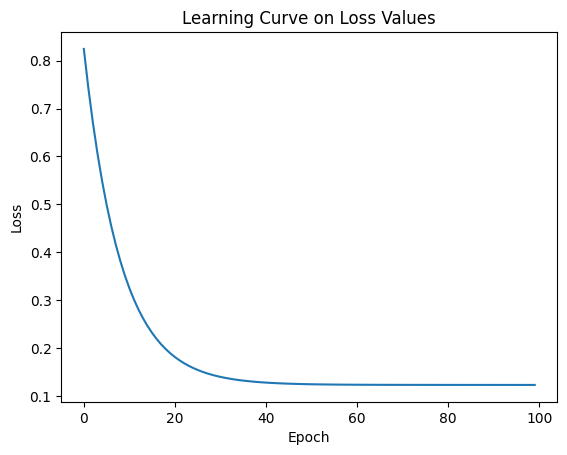

In [ ]:
torch.manual_seed(42)   # Set random seed
eta = 0.03              # Learning rate
N = 100                 # Number of epochs


model = nn.Linear(1, 1)                                             # Define a simple linear model
loss_fn = nn.MSELoss()                                              # Define a simple loss function
optimizer = torch.optim.SGD(params=model.parameters(), lr=eta)      # Define a simple optimizer


# Train the model and record loss values for each epoch
loss_list=[]
for epoch in range(N):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    print(f"Epoch {epoch+1} => Loss: {loss:.6f}")       # Print current loss
    loss_list.append(loss.item())                       # Append current loss to list for plotting
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

# Plot the learning curve
plt.plot(range(N), loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve on Loss Values')
plt.show()

In [ ]:
# Evaluate the model on the test data and compute L1 loss
y_predict = model(X_test)
l1_loss=nn.functional.l1_loss(y_predict, y_test)
print(f"L1 Loss : {l1_loss:.3f}")

L1 Loss : 0.237


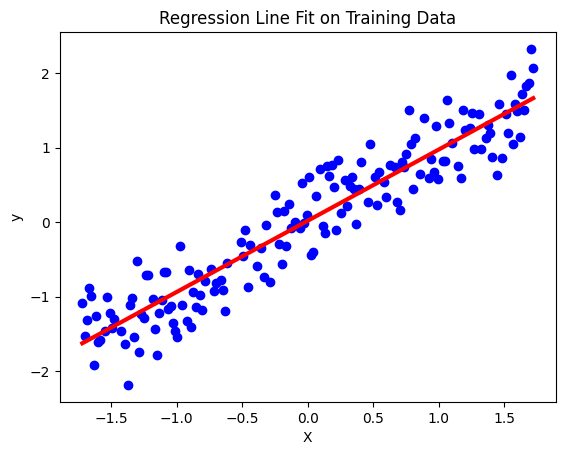

In [ ]:
# Plot of training data and model predictions

x_sample = torch.linspace(X_train.min(), X_train.max(), 50).unsqueeze(1)
yp = model(x_sample)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(x_sample.detach(), yp.detach(), color='red',linewidth=3, label='Model Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regression Line Fit on Training Data')
plt.show()